# unit12 지하철 시간대별 데이터

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949')
df.shape

(598, 53)

In [17]:
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25
3,2019-05,1호선,152.0,종각,116,3,"4,576","5,233","4,780","33,366",...,"5,882","3,973","1,565",1,1,0,0,0,0,2019-06-03 10:56:25
4,2019-05,1호선,153.0,종로3가,216,16,"5,505","3,036","4,790","16,235",...,"6,715","3,375","2,753",1,37,0,1,0,0,2019-06-03 10:56:25


In [18]:
df0 = df.drop(0) #좌측에 0이고 써진 행을 버리기
df0.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25


문제1. 출근시간대에 사람들이 가장 많이 타고 내리는 역
- 출근시간대 지정 : 새벽 ~ 오전 9시
- 타는 역과 내리는 역 따로 지정
- 상위 10개씩

In [48]:
출근시간시작위치 =  4
출근시간끝위치 = 13
df0 = df0.replace(',', '', regex=True)
arr = np.array(df0)
arr.shape
역이름 = arr[:, 3]
역별승차인원 = arr[:, 출근시간시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:, 출근시간시작위치+1:출근시간끝위치+1:2].astype(np.int)
역별승차인원합 = np.sum(역별승차인원, axis=1)
역별하차인원합 = np.sum(역별하차인원, axis=1)
역별승차인원합[0], 역별하차인원합[0]

(162732, 425823)

In [49]:
k=10
threshold = np.sort(역별승차인원합)[-k]
threshold

382801

In [51]:
mask = 역별승차인원합 >= threshold
역별승차인원합[mask], 역이름[mask]

(array([412219, 454340, 759642, 490300, 444523, 454963, 412919, 382801,
        389612, 413462]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '수유(강북구청)', '화곡', '까치산'], dtype=object))

Text(0.5, 1.0, '승차인원')

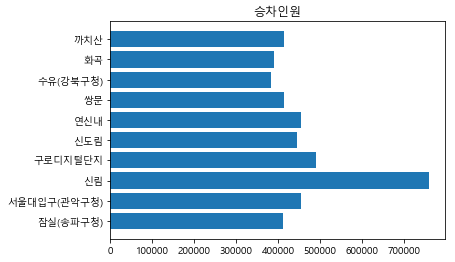

In [57]:
plt.rc('font', family='Malgun Gothic') #한글
plt.barh(역이름[mask], 역별승차인원합[mask])
plt.title('승차인원')

문제2. 밤 11시에 사람들이 가장 많이 타는 역 -11

In [62]:
승차인원_11시 = arr[:, -11].astype(np.int)
승차인원_11시

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [69]:
k=10
threshold = np.sort(승차인원_11시)[-k]
threshold

42696

In [70]:
mask = 승차인원_11시 >= threshold
승차인원_11시[mask], 역이름[mask]

(array([ 48067,  78429,  48786, 128937,  50264,  42696, 151504,  74678,
         55240,  43998]),
 array(['종각', '건대입구', '잠실(송파구청)', '강남', '사당', '합정', '홍대입구', '신촌', '혜화',
        '명동'], dtype=object))

Text(0.5, 1.0, '승차인원_11시')

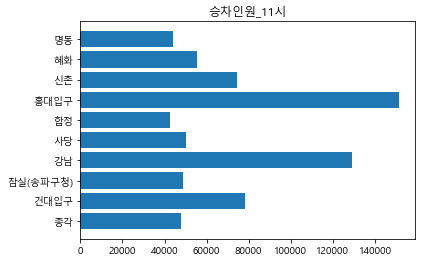

In [71]:
plt.rc('font', family='Malgun Gothic') #한글
plt.barh(역이름[mask], 승차인원_11시[mask])
plt.title('승차인원_11시')